In [31]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
from scipy.optimize import curve_fit

# Q1

In [32]:
def RK4(f, t_in, t_f, h, y_0):
    
    T = np.arange(t_in,t_f+h,h)
    Y = np.zeros((len(T),2))
    Y[0] = y_0
    
    for i in range(1,len(T)):
        t = T[i-1]
        y = Y[i-1]
        
        k1 = h*f(t,y)
        k2 = h*f(t+h/2,y+k1/2)
        k3 = h*f(t+h/2,y+k2/2)
        k4 = h*f(t+h/2,y+k3)
        
        Y[i] = Y[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
        
    return Y

Steps required : 200001


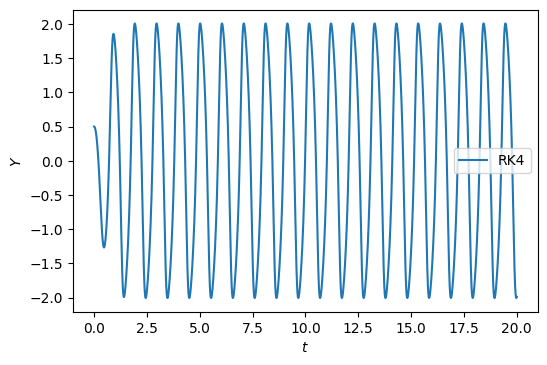

In [33]:
mu = 5
da = 40

f = lambda t,y: np.array([y[1], mu*(1-y[0]**2)*y[1] - da*y[0]])
t_in = 0
t_f = 20
y_0 = [0.5,0]

h = 1e-4

Y1 = RK4(f,t_in, t_f, h, y_0)
T = np.arange(t_in,t_f+h,h)

print("Steps required :",len(T))

plt.plot(T,Y1[:,0],label='RK4')

plt.legend()
plt.ylabel('$Y$')
plt.xlabel('$t$')
#plt.grid(True)
plt.show()

# Q2

In [34]:
# Dormand-Prince
a2 = 1/5; b21 = 1/5;
a3 = 3/10; b31 = 3/40; b32 = 9/40;
a4 = 4/5; b41 = 44/45; b42 = -56/15; b43 = 32/9;
a5 = 8/9; b51 = 19372/6561; b52 = -25360/2187; b53 = 64448/6561; b54 =-212/729;
a6 = 1; b61 = 9017/3168; b62 = -355/33; b63 = 46732/5247; b64 = 49/176;b65 = -5103/18656;
a7 = 1; b71 = 35/384; b72 = 0; b73 = 500/1113; b74 = 125/192;b75 = -2187/6784; b76 = 11/84;
c1 = 35/384; c2 = 0; c3 = 500/1113; c4 = 125/192; c5=-2187/6784; c6 = 11/84; c7= 0;
c1s = 5179/57600; c2s = 0; c3s = 7571/16695; c4s = 393/640; c5s = -92097/339200;c6s = 187/2100; c7s = 1/40;

def erk54(f, t, y, h):
    k1 = h*f(t, y)
    k2 = h*f(t + a2*h, y + b21*k1)
    k3 = h*f(t + a3*h, y + b31*k1 + b32*k2)
    k4 = h*f(t + a4*h, y + b41*k1 + b42*k2 + b43*k3)
    k5 = h*f(t + a5*h, y + b51*k1 + b52*k2 + b53*k3 + b54*k4)
    k6 = h*f(t + a6*h, y + b61*k1 + b62*k2 + b63*k3 + b64*k4 + b65*k5)
    y5 = y + c1*k1 + c2*k2 + c3*k3 + c4*k4 + c5*k5 + c6*k6
    k7 = h*f(t + a7*h, y5)
    y4 = y + c1s*k1 + c2s*k2 + c3s*k3 + c4s*k4 + c5s*k5 + c6s*k6 + c7s*k7
        
    return y5, y4


In [35]:

def caller(f, t_in, t_f, max_iter, y_0, h0, abstol, reltol):
    T = np.zeros(max_iter)
    T[0] = t_in
    
    Y5 = np.zeros((max_iter,2))
    Y5[0] = y_0
    
    h = h0
    i = 1
    t = t_in
    
    while i<=max_iter and t<=t_f:
        t = T[i-1]
        y = Y5[i-1]
        y5,y4 = erk54(f, t, y, h)
        
        Y5[i] = y5
        
        T[i] = T[i-1]+h
        
        # determine tolerance
        if i == 1:
            tol = abstol + reltol*np.linalg.norm(Y5[i]);
        else:
            tol = abstol + reltol*max([np.linalg.norm(Y5[i]),np.linalg.norm(Y5[i-1])])
        
        
        # calculate error
        if abs(y5[0] -y4[0])>0:
            err = abs(y5[0] -y4[0])
        else:
            err =  tol/100
        
        h = 0.9*h*(tol/err)**(1/5)
        
        i += 1
    
    if T[-1]< t_f and T[-1]!=0:
        print("Warning: Increase max_iter")
        
    return Y5[:i],T[:i]
    

Steps required : 772


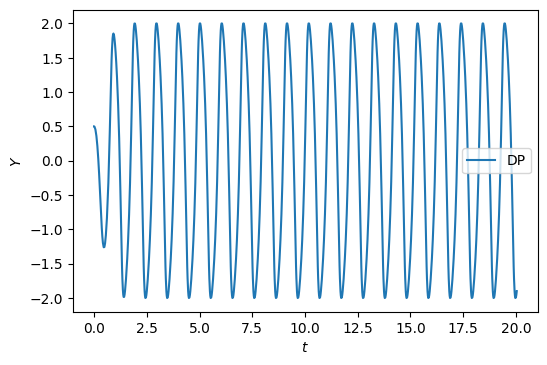

In [36]:
mu = 5
da = 40

f = lambda t,y: np.array([y[1], mu*(1-y[0]**2)*y[1] - da*y[0]])

t_in = 0
t_f = 20
y_0 = [0.5,0]
max_iter = 1000

abstol = 1e-6
reltol = 1e-8

h0 = 1e-6


Y5,T = caller(f, t_in, t_f, max_iter, y_0, h0, abstol, reltol)

print("Steps required :",len(T))

plt.plot(T,Y5[:,0],label='DP')
#plt.plot(T,Y5[:,1],label='DP')

plt.legend()
plt.ylabel('$Y$')
plt.xlabel('$t$')
#plt.grid(True)
plt.show()

# Q3

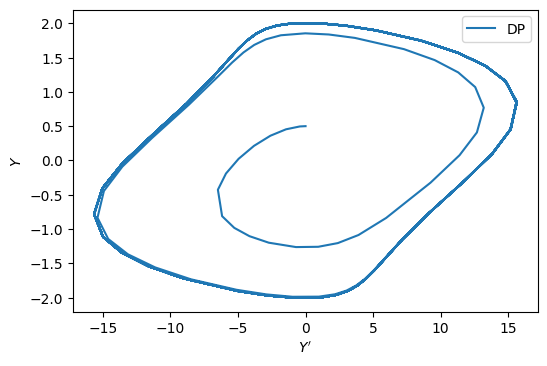

In [37]:
plt.plot(Y5[:,1],Y5[:,0],label='DP')

plt.legend()
plt.ylabel('$Y$')
plt.xlabel('$Y^\prime$')
#plt.grid(True)
plt.show()

This is slightly bad (not smooth) towards the extreme of $Y^\prime$ but good towards the extreme of $Y$ in phase space as we used the Dormand-Prince method considering the **eRK54** function on $Y$.

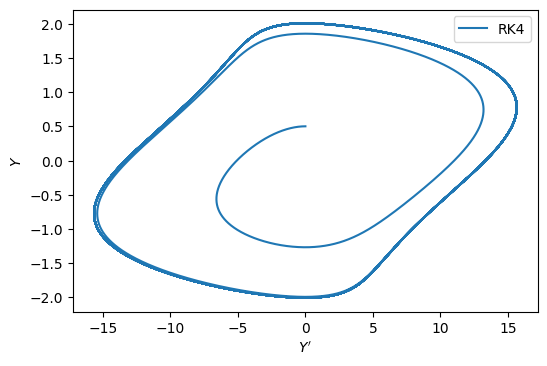

In [38]:
Y1 = RK4(f,t_in, t_f, h, y_0)
T = np.arange(t_in,t_f+h,h)
plt.plot(Y1[:,1],Y1[:,0],label='RK4')

plt.legend()
plt.ylabel('$Y$')
plt.xlabel('$Y^\prime$')
#plt.grid(True)
plt.show()